In [2]:
import seaborn as sns
from matplotlib import cm
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline



In [15]:
# Load the dataset
data = pd.read_csv("./data/extracted/NFL/NFL.csv")

data.head()
list(data.columns)
len(data)
#data.head(5)

#help(pd.read_csv)
#help(pd.read_excel)

17172

In [16]:
# Filtering and Selecting
ageFilterValue = 25
ageFilter = data["Age"] > ageFilterValue
heightFilter = data["Height (inches)"] > 70
aboveAge = data[ageFilter & heightFilter]
len(aboveAge)
aboveAge.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
12,33.0,NaN,12/4/1983,Boise State,Retired,NaN,1 Season,74.0,NaN,NaN,"Zabransky, Jared",NaN,jaredzabransky/2495791,NaN,219.0,2007 - 2007
13,27.0,"Little Rock , AR",11/22/1989,Arkansas,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Adams, Joe",NaN,joeadams/2532782,NaN,185.0,2012 - 2014
14,73.0,"St. Louis , MO",12/8/1943,Missouri,Retired,NaN,8 Seasons,73.0,NaN,NaN,"Otto, Gus",NaN,gusotto/2522592,NaN,220.0,1965 - 1972


In [17]:
data["Current Status"].unique()


array(['Retired', 'Active', 'Unsigned free agent', 'Suspended',
       'Injured reserve', 'Physically unable to perform'], dtype=object)

In [18]:
activeFilter = data["Current Status"] == "Active"

aboveAndActive = data[ageFilter & activeFilter]
len(aboveAndActive)
aboveAndActive.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
35,29.0,"Dayton , OH",4/1/1988,Ohio State,Active,Carolina Panthers,8th season,71.0,Northmont HS,"Clayton, OH","Coleman, Kurt",20.0,kurtcoleman/494261,SS,200.0,NaN
37,26.0,"Rodeo , CA",7/28/1990,Ohio U.,Active,Oakland Raiders,4th season,72.0,De La Salle HS,"Concord, CA","Carrie, T.J.",38.0,t.j.carrie/2550164,SS,205.0,NaN
39,29.0,"Fort Myers , FL",11/30/1987,South Florida,Active,Miami Dolphins,8th season,72.0,Cape Coral HS,FL,"Allen, Nate",NaN,nateallen/2508043,DB,210.0,NaN
63,27.0,"Stockton , CA",1/1/1990,Montana,Active,Los Angeles Rams,6th season,74.0,Edison HS,"Stockton, CA","Johnson, Trumaine",22.0,trumainejohnson/2532877,CB,208.0,NaN
64,30.0,"Casper , WY",11/19/1986,Utah,Active,San Francisco 49ers,8th season,76.0,Hillcrest HS,"Midvale, UT","Beadles, Zane",68.0,zanebeadles/496980,G,305.0,NaN


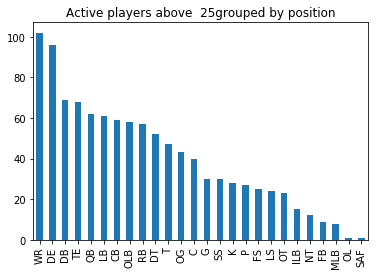

In [19]:
# Plotting
frequencies = aboveAndActive["Position"].value_counts()
frequencies.plot.bar(
    title=(
        "Active players above  " +
        str(ageFilterValue) +
        "grouped by position"
    )
)

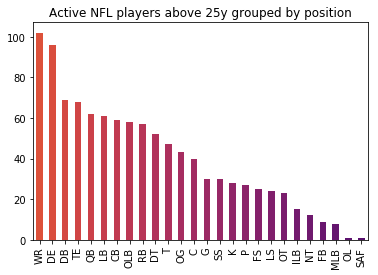

In [20]:
# Plotting with style
color = cm.inferno_r(np.linspace(.4, .8, 30))
frequencies.plot(
    kind="bar",
    title=(
        "Active NFL players above " +
        str(ageFilterValue) +
        "y grouped by position"
    ),
    color=color
)
plt.savefig('./images/nflBar.png', dpi=500)

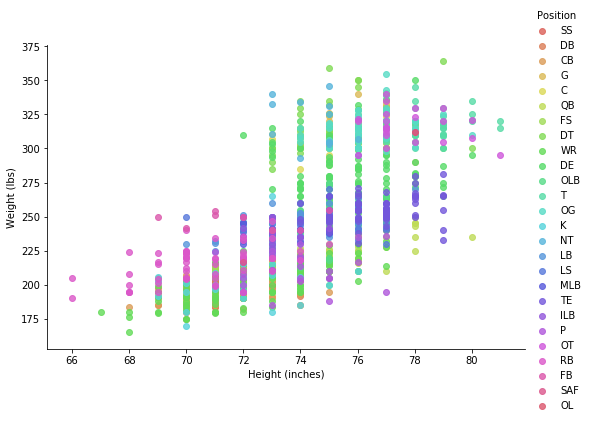

In [21]:
# Scatter plot
sns.lmplot(
    x="Height (inches)", y="Weight (lbs)", data=aboveAndActive,
    aspect=1.5, fit_reg=False, hue='Position', legend=True,
    palette=sns.color_palette("hls", len(aboveAndActive["Position"].unique()))
)
plt.savefig('./images/nflScatter.png', dpi=500)